# **Exploratory Data Analysis of Earthquake Events in Indonesia (2008–2023)**


I chose this project because earthquakes are a recurring issue in Indonesia. With a comprehensive dataset spanning 15 years, the analysis results are expected to provide valuable insights that contribute to public awareness.


**Project Goals**
---
* Understand seismic patterns in Indonesia (2008–2023)
* Identify high-risk areas based on earthquake frequency and magnitude
* Analyze earthquake characteristics (depth vs. magnitude)

**Real-World Goals**
---
* Increase awareness of regions that are most
frequently affected by earthquakes
* Identify whether there are specific temporal patterns in earthquake occurrences
* Analyze which type of earthquake (shallow vs. deep) poses greater risk

**Dataset Overview**
---
This project utilizes the *"Earthquake in Indonesia (katalog_gempa.csv)"* dataset, which is publicly available on Kaggle. The dataset can be accessed by clicking [here.](#https://www.kaggle.com/datasets/kekavigi/earthquakes-in-indonesia)


This dataset contains records of earthquake events in Indonesia from 2008 to 2023. The dataset includes the following attributes:

* `tgl` : Date of the event
* `ot` : Timestamp of the event
* `lat` : Latitude of the earthquake epicenter (in degrees), ranging from 6°N to 11°S
* `lon` : Longitude of the earthquake epicenter (in degrees), ranging from 94°E to 142°E
* `depth` : Depth of the event (in kilometers)
* `mag` : Magnitude of the event, ranging from 1 to 7.9
* `remark`  : Flinn-Engdahl region of the event



**Data Exploratory**
---

**Data Preprocessing**
---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving katalog_gempa.csv to katalog_gempa.csv


In [ ]:
df = pd.read_csv('katalog_gempa.csv')

In [ ]:
df.head()

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      92887 non-null  object 
 1   ot       92887 non-null  object 
 2   lat      92887 non-null  float64
 3   lon      92887 non-null  float64
 4   depth    92887 non-null  int64  
 5   mag      92887 non-null  float64
 6   remark   92887 non-null  object 
 7   strike1  2735 non-null   float64
 8   dip1     2735 non-null   float64
 9   rake1    2735 non-null   float64
 10  strike2  2735 non-null   float64
 11  dip2     2735 non-null   float64
 12  rake2    2735 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 9.2+ MB


The `tgl` and `ot` columns are still of type object. To facilitate prediction, it is better to convert these columns into datetime type.

Meanwhile, the `remark` column is also of type object; in this case, it is more appropriate to convert it into a categorical type.

In [ ]:
df['tgl'] = pd.to_datetime(df['tgl'], format='%Y/%m/%d')
df['ot'] = pd.to_datetime(df['ot'], format='%H:%M:%S.%f')
df['remark'] = df['remark'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tgl      92887 non-null  datetime64[ns]
 1   ot       92887 non-null  datetime64[ns]
 2   lat      92887 non-null  float64       
 3   lon      92887 non-null  float64       
 4   depth    92887 non-null  int64         
 5   mag      92887 non-null  float64       
 6   remark   92887 non-null  category      
 7   strike1  2735 non-null   float64       
 8   dip1     2735 non-null   float64       
 9   rake1    2735 non-null   float64       
 10  strike2  2735 non-null   float64       
 11  dip2     2735 non-null   float64       
 12  rake2    2735 non-null   float64       
dtypes: category(1), datetime64[ns](2), float64(9), int64(1)
memory usage: 8.6 MB


In [ ]:
df.isnull().sum()

,0
tgl,0
ot,0
lat,0
lon,0
depth,0
mag,0
remark,0
strike1,90152
dip1,90152
rake1,90152


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
92882,False
92883,False
92884,False
92885,False


**Check Outliers and Skewedness of Magnitudo**

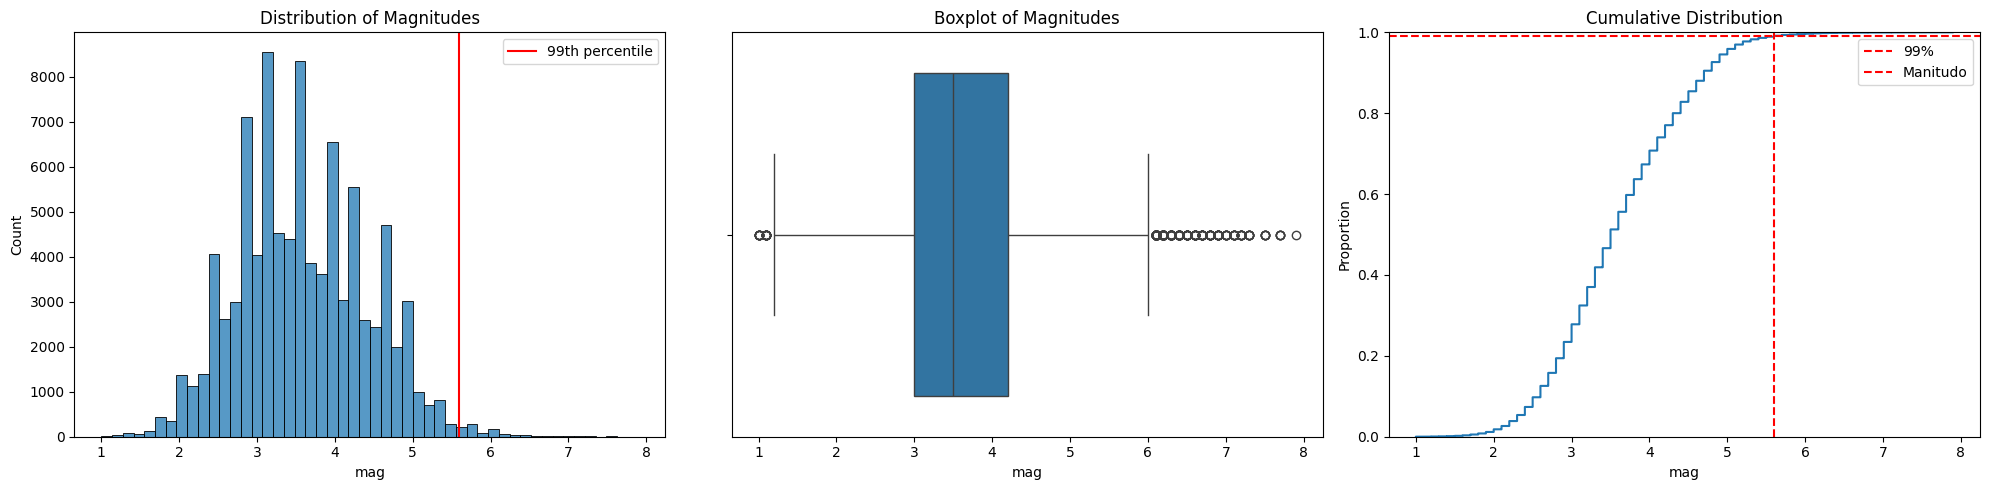

5.6


In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['mag'], bins=50)
plt.axvline(np.percentile(df['mag'], 99), color='red', linestyle='-', label='99th percentile')
plt.title('Distribution of Magnitudes')
plt.legend()

plt.subplot(1, 3, 2)
sns.boxplot(x=df['mag'])
plt.title('Boxplot of Magnitudes')

plt.subplot(1, 3, 3)
sns.ecdfplot(df['mag'])
threshold_99 = np.percentile(df['mag'], 99)
plt.axhline(0.99, color='red', linestyle='--', label='99%')
plt.axvline(threshold_99, color='red', linestyle='--', label='Manitudo')
plt.title('Cumulative Distribution')
plt.legend()

plt.tight_layout()
plt.show()
print(threshold_99)

Skewness analysis is used to examine the distribution of the data.
The ```mag``` variable shows a positive (right) skew, indicating that most earthquakes occurred within a low-to-moderate magnitude range (2–5).

Higher-magnitude earthquakes (above 6) still occur, but with significantly lower frequency than smaller ones.

**Check Outliers and Skewedness of Depth**

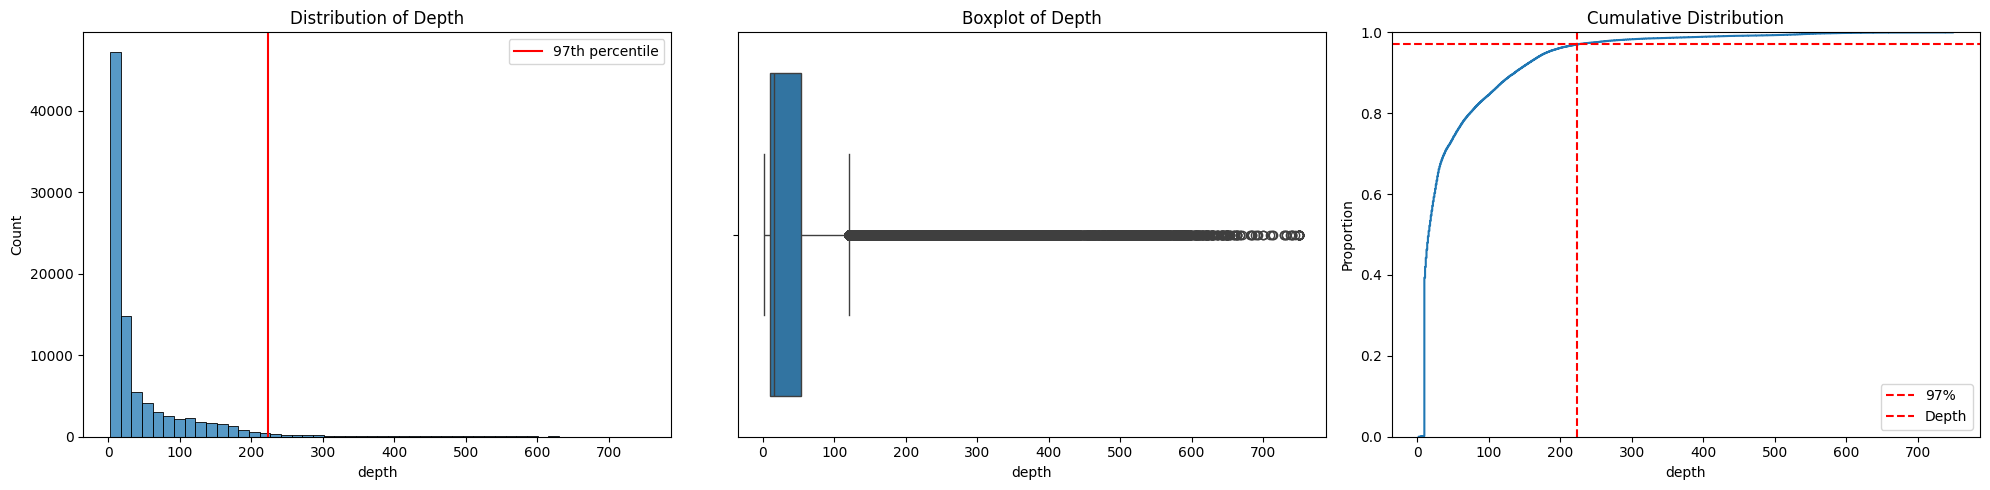

223.41999999999825


In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['depth'], bins=50)
plt.axvline(np.percentile(df['depth'], 97), color='red', linestyle='-', label='97th percentile')
plt.title('Distribution of Depth')
plt.legend()

plt.subplot(1, 3, 2)
sns.boxplot(x=df['depth'])
plt.title('Boxplot of Depth')

plt.subplot(1, 3, 3)
sns.ecdfplot(df['depth'])
threshold_97 = np.percentile(df['depth'], 97)
plt.axhline(0.97, color='red', linestyle='--', label='97%')
plt.axvline(threshold_97, color='red', linestyle='--', label='Depth')
plt.title('Cumulative Distribution')
plt.legend()

plt.tight_layout()
plt.show()
print(threshold_97)

The skewness analysis of the ```depth``` variable indicates a positive (right) skew. This pattern suggests that shallow earthquakes (<100 km) are more common, while intermediate to deep earthquakes (>100 km and >300 km) occur less frequently in comparison.

**Earthquakes Distribution**

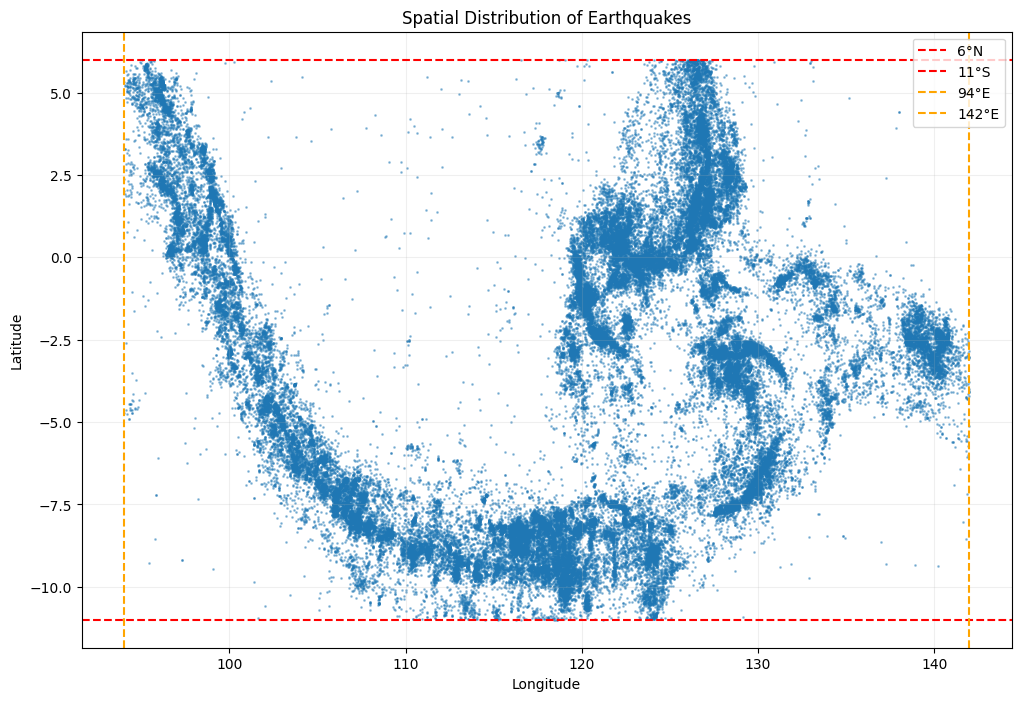

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df['lon'], df['lat'], alpha=0.4, s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Earthquakes')
plt.grid(True, alpha=0.2)

plt.axhline(y=6, color='red', linestyle='--', label='6°N')
plt.axhline(y=-11, color='red', linestyle='--', label='11°S')
plt.axvline(x=94, color='orange', linestyle='--', label='94°E')
plt.axvline(x=142, color='orange', linestyle='--', label='142°E')

plt.legend()
plt.show()

Earthquake occurrences in Indonesia are predominantly concentrated along the Pacific Ring of Fire, primarily near coastal and onshore regions.
The distribution extends from Sumatra through Java, Bali, Nusa Tenggara (NTT and NTB), and Sumba, continuing northward toward Sulawesi, with additional clusters observed around parts of Papua

This spatial pattern is largely controlled by the subduction zones and tectonic interactions along the Pacific and Indo-Australian plates.

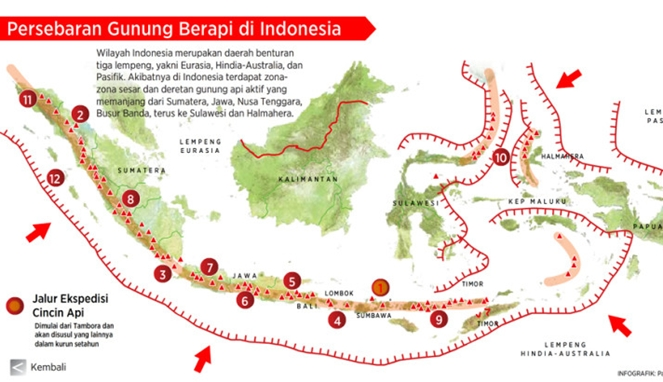

**Magnitudo Frequency**
----

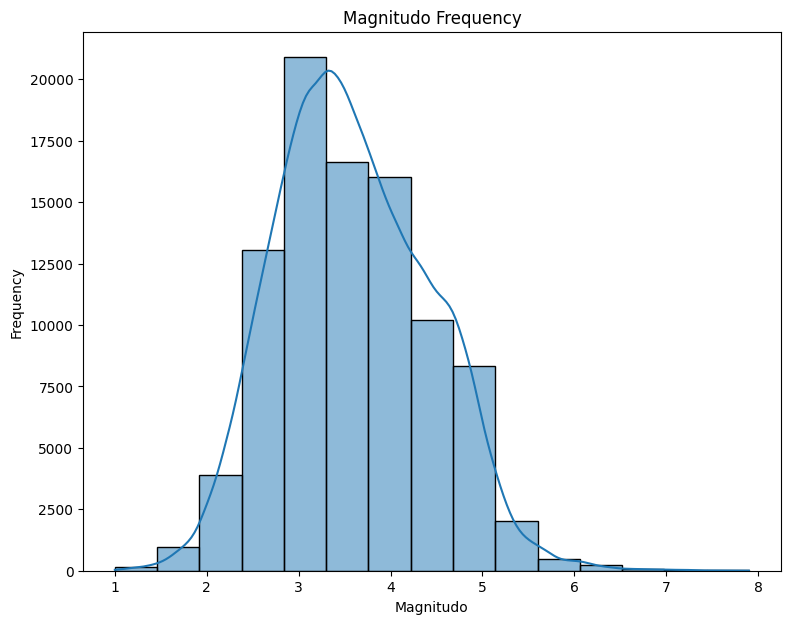

In [ ]:
plt.figure(figsize=(9, 7))
sns.histplot(df['mag'], bins=15, kde=True)
plt.title('Magnitudo Frequency')
plt.xlabel('Magnitudo')
plt.ylabel('Frequency')
plt.show()

In [ ]:
mean_mag = df['mag'].mean()
median_mag = df['mag'].median()
mode_mag = df['mag'].mode()[0]

print("Mean:", mean_mag)
print("Median:", median_mag)
print("Mode:", mode_mag)

Mean: 3.592788011239463
Median: 3.5
Mode: 3.3


In [ ]:
def categorize_mag(mag):
  if mag < 4.0:
    return 'Minor'
  elif mag < 5.0:
    return 'Light'
  elif mag < 6.0:
    return 'Moderate'
  elif mag < 7.0:
    return 'Strong'
  else:
    return 'Major'
df['mag_category'] = df['mag'].apply(categorize_mag)

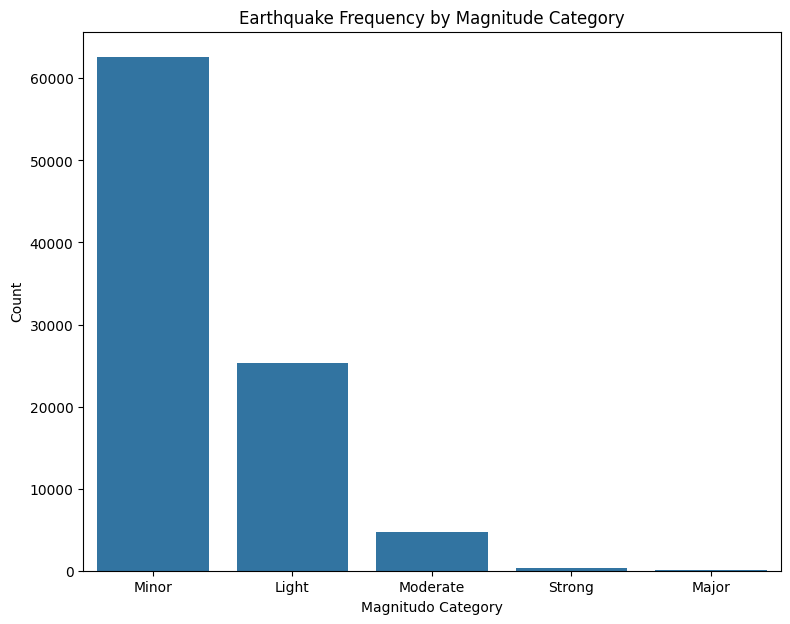

In [ ]:
plt.figure(figsize=(9, 7))
sns.countplot(x='mag_category', data=df, order=['Minor', 'Light', 'Moderate', 'Strong', 'Major'])
plt.title('Earthquake Frequency by Magnitude Category')
plt.xlabel('Magnitudo Category')
plt.ylabel('Count')
plt.show()

From the Earthquake Frequency by Magnitude Category plot, it can be seen that minor earthquakes are the most frequent in Indonesia, followed by light and moderate ones.

The gap between each category is quite significant, indicating that earthquake events in Indonesia are dominated by minor and light magnitudes, while strong and major earthquakes are very rare.

**Depth Distribution**
---

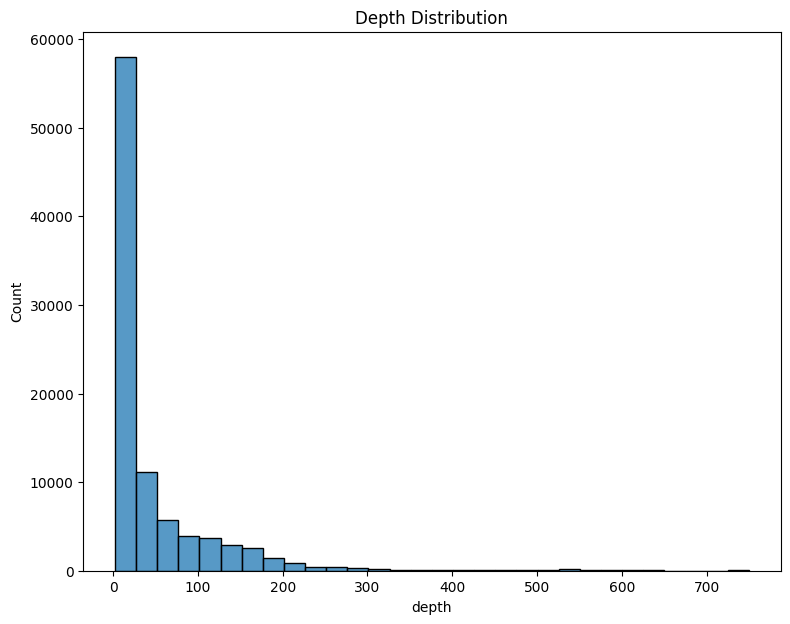

16.0


In [ ]:
plt.figure(figsize=(9, 7))
sns.histplot(data=df, x="depth", bins=30)
plt.title('Depth Distribution')
plt.show()
median_mag = df['depth'].median()
print(median_mag)

In [ ]:
def categorize_depth(depth):
  if depth < 70:
    return 'Shallow'
  elif depth < 300:
    return 'Intermediate'
  else:
    return 'Deep'
df['depth_category'] = df['depth'].apply(categorize_depth)

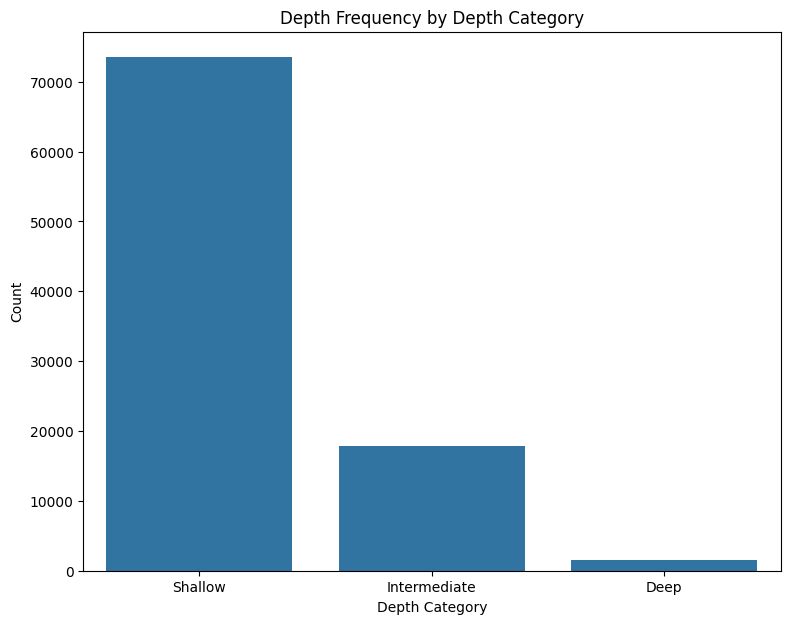

In [ ]:
plt.figure(figsize=(9, 7))
sns.countplot(x='depth_category', data=df, order=['Shallow', 'Intermediate', 'Deep'])
plt.title('Depth Frequency by Depth Category')
plt.xlabel('Depth Category')
plt.ylabel('Count')
plt.show()

Based on the Depth Frequency by Depth Category plot, shallow earthquakes (<70 km) dominate seismic activity in Indonesia.
There is a significant gap between the number of shallow and intermediate (70–300 km) earthquakes, while deep earthquakes (>300 km) occur very rarely.

This pattern indicates that Indonesia’s seismic events are mainly controlled by shallow subduction zone activity near the Earth’s surface.

**Earthquakes Frequency**
---

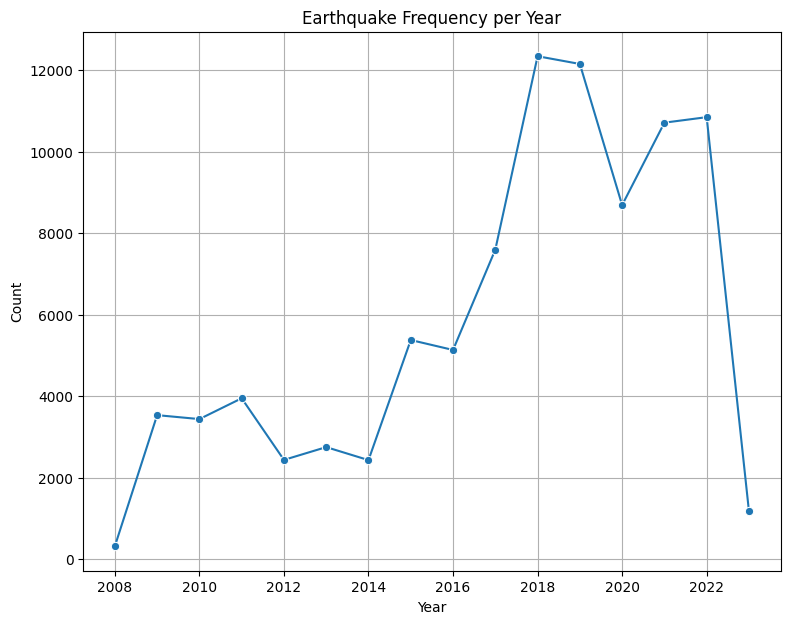

In [ ]:
df['year'] = df['tgl'].dt.year
yearly_counts = df['year'].value_counts().sort_index().reset_index()
yearly_counts.columns = ['year', 'count']

plt.figure(figsize=(9, 7))
sns.lineplot(x='year', y='count', data=yearly_counts, marker='o')
plt.title('Earthquake Frequency per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()


Based on the Earthquake Frequency per Year plot, the highest earthquake frequency occurred in 2018, while the lowest frequencies were observed in 2012 and 2014.

A significant increase in seismic activity was recorded between 2017 and 2018.
Earthquake frequency is influenced by the accumulation of stress along tectonic plate boundaries, where the sudden release of built-up energy generates seismic events.

Additionally, the high activity in 2018 may be attributed to aftershocks, as large earthquakes are often followed by hundreds or even thousands of smaller subsequent events within the same region.

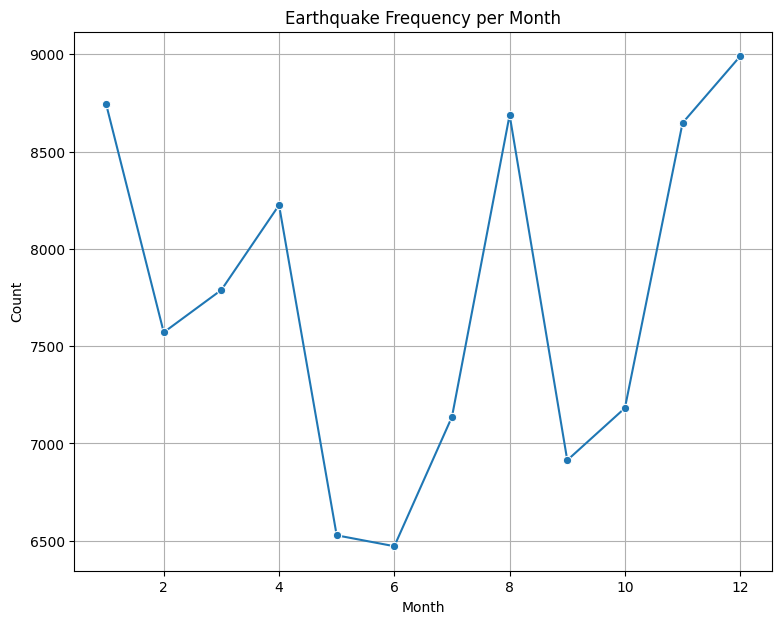

In [ ]:
df['month'] = df['tgl'].dt.month
monthly_counts = df['month'].value_counts().sort_index().reset_index()
monthly_counts.columns = ['month', 'count']
plt.figure(figsize=(9, 7))
sns.lineplot(x='month', y='count', data=monthly_counts, marker='o')
plt.title('Earthquake Frequency per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)

The analysis shows that earthquakes in Indonesia tend to occur more frequently in January, April, August, November, and December.
In general, there is no significant seasonal factor affecting earthquake activity across months.

However, several studies have reported a weak correlation between seasonal changes and minor earthquakes, which may be influenced by:

* Seasonal variations in atmospheric pressure

* Fluctuations in sea tides and extreme rainfall, which can slightly alter crustal stress in coastal or subduction zones.

Nevertheless, this correlation is considered very weak, and the observed monthly increase in activity is most likely caused by aftershocks following major earthquake events.

In [ ]:
monthly_avg = df.groupby(df['tgl'].dt.month).size().reset_index(name='count')
monthly_avg['avg_per_month'] = monthly_avg['count'] / df['tgl'].dt.year.nunique()
print(monthly_avg)

    tgl  count  avg_per_month
0     1   8744       546.5000
1     2   7571       473.1875
2     3   7789       486.8125
3     4   8225       514.0625
4     5   6528       408.0000
5     6   6472       404.5000
6     7   7137       446.0625
7     8   8688       543.0000
8     9   6914       432.1250
9    10   7182       448.8750
10   11   8647       540.4375
11   12   8990       561.8750


**Earthquake Maps in Indonesa**
---

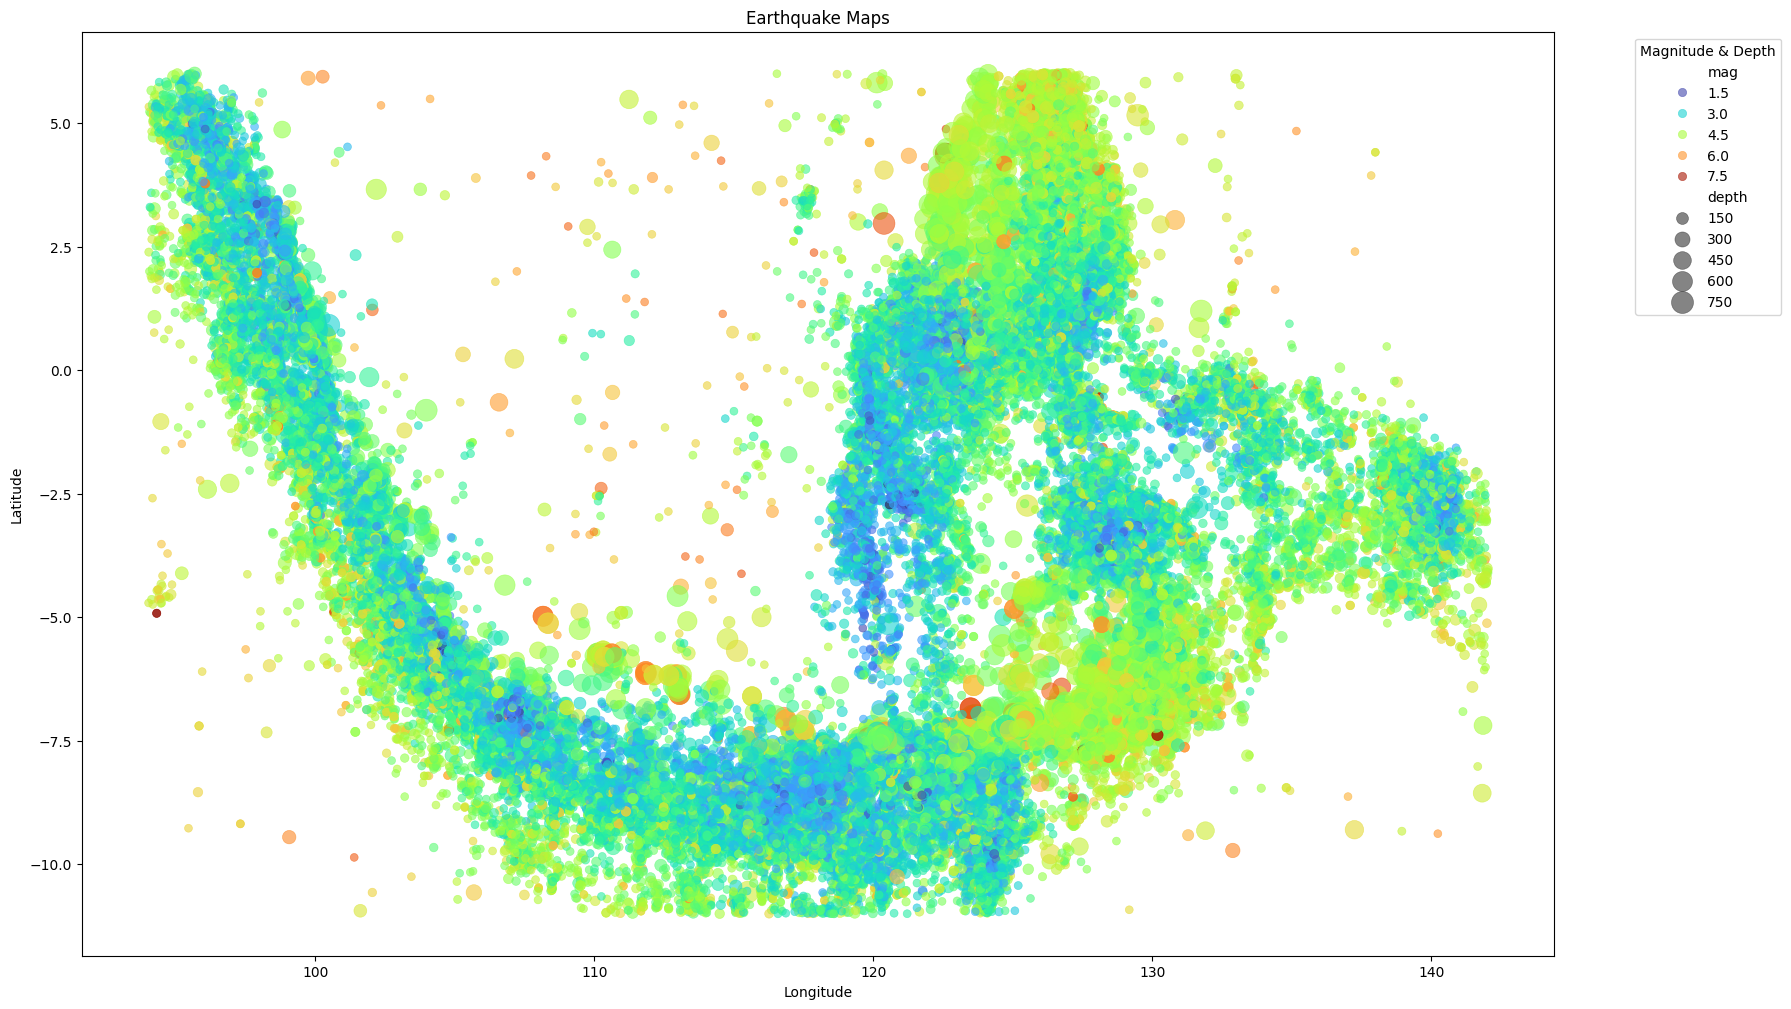

In [ ]:
plt.figure(figsize=(19, 12))
sns.scatterplot(
    data=df, x='lon', y='lat', hue='mag', size='depth', sizes=(30, 250), palette='turbo', alpha=0.6, edgecolor=None
)
plt.title('Earthquake Maps')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Magnitude & Depth', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The earthquake distribution map based on longitude, latitude, magnitude, and depth shows that earthquakes with magnitudes between 3 and 4.5 and depths less than 150 km occur most frequently in Indonesia.

Most of these seismic events are concentrated along the Pacific Ring of Fire, particularly around Sumatra, Java, Nusa Tenggara, and Sulawesi, which are active subduction zones.

This indicates that Indonesia’s seismic activity is mainly dominated by shallow earthquakes of light to moderate intensity occurring along tectonic plate boundaries.

/tmp/ipython-input-1548836188.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_counts = df.groupby('remark').size().reset_index(name='count')


                            remark  count
18  Minahassa Peninsula - Sulawesi   9433
41            Sulawesi - Indonesia   7897
44      Sumbawa Region - Indonesia   7312
15                Java - Indonesia   6798
28    Northern Sumatra - Indonesia   5941


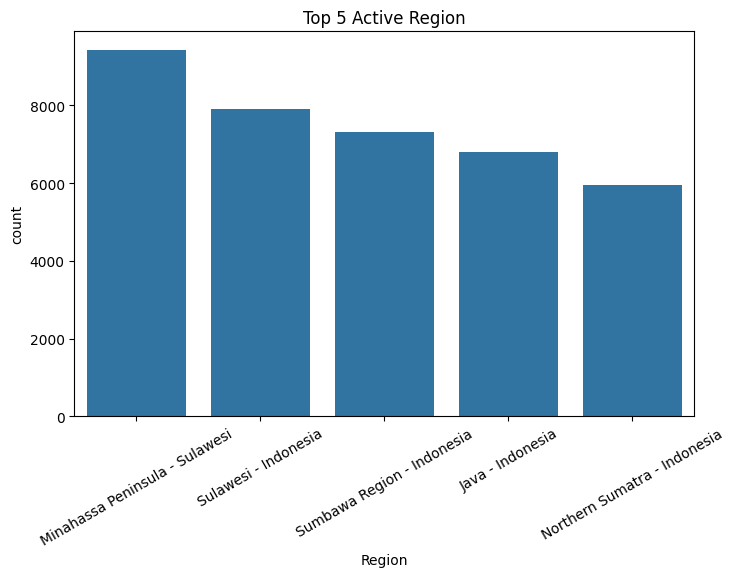

In [ ]:
region_counts = df.groupby('remark').size().reset_index(name='count')
top5_region = region_counts.nlargest(5, 'count')
print(top5_region)
plt.figure(figsize=(8, 5))
sns.countplot(x='remark', data=df[df['remark'].isin(top5_region['remark'])], order=top5_region['remark'])
plt.title('Top 5 Active Region')
plt.xlabel('Region')
plt.xticks(rotation=30)
plt.ylabel('count')
plt.show()

Based on the calculated earthquake frequency per region, the top five most seismically active regions are:
* Minahasa Peninsula – Sulawesi
* Sulawesi – Indonesia
* Sumbawa – Indonesia
* Java – Indonesia
* Northern Sumatra – Indonesia.

This finding is consistent with the spatial distribution map and the locations of these regions along the Pacific Ring of Fire.
It indicates that Indonesia’s seismic activity is primarily concentrated in active subduction zones, where the Indo-Australian, Eurasian, and Pacific plates interact.

In [ ]:
region_stats = df.groupby('remark').agg(
    count=('remark', 'size'),
    avg_depth=('depth', 'mean'),
    avg_mag=('mag', 'mean')
).reset_index()

top5_region_stats = region_stats.nlargest(5, 'count')

print(top5_region_stats)

                            remark  count  avg_depth   avg_mag
18  Minahassa Peninsula - Sulawesi   9433  68.068165  3.294699
41            Sulawesi - Indonesia   7897  14.787768  3.204888
44      Sumbawa Region - Indonesia   7312  35.821937  3.161953
15                Java - Indonesia   6798  39.534275  3.357576
28    Northern Sumatra - Indonesia   5941  37.278741  3.450614


/tmp/ipython-input-4013656614.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_stats = df.groupby('remark').agg(


**Correlation**
---

/tmp/ipython-input-1885146773.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='depth', y='mag', palette='turbo', alpha=0.6, s=40)
/tmp/ipython-input-1885146773.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Depth', loc='upper right')


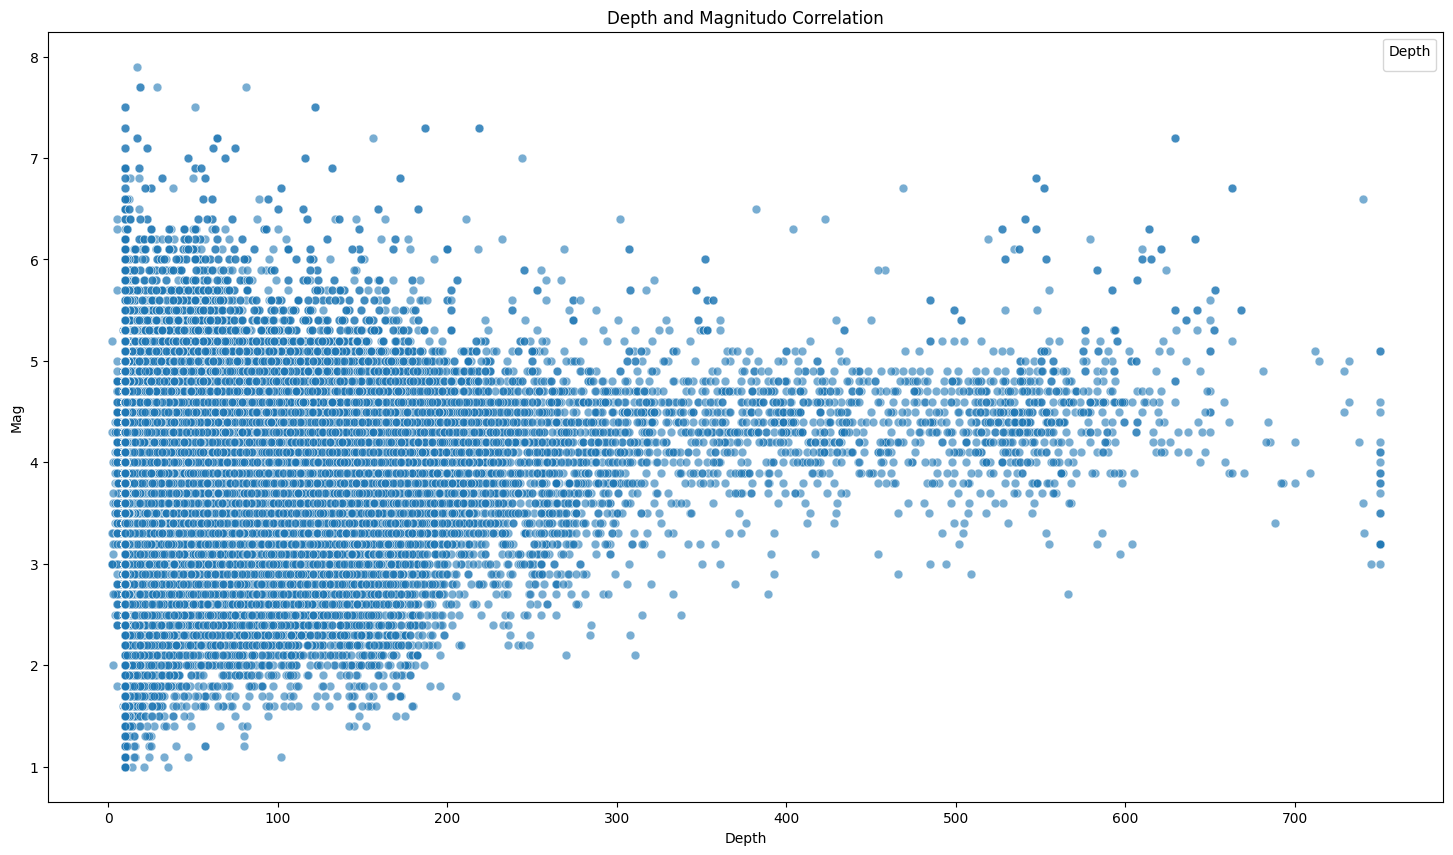

In [ ]:
plt.figure(figsize=(18, 10))
sns.scatterplot(data=df, x='depth', y='mag', palette='turbo', alpha=0.6, s=40)
plt.title('Depth and Magnitudo Correlation')
plt.xlabel('Depth')
plt.ylabel('Mag')
plt.legend(title='Depth', loc='upper right')
plt.show()

In the plot showing the correlation between depth and magnitude, there is no clear or strong linear relationship between earthquake depth and strength.

Earthquakes occurring at depths below 150 km show a wide range of magnitudes, from 1 to 7.9, indicating that shallow earthquakes can produce both minor and major events.

Meanwhile, earthquakes with depths between 300–700 km generally have magnitudes above 3, reaching up to 7. This suggests that deep-focus earthquakes tend to produce moderate to large magnitudes, though they occur far less frequently than shallow ones.

Overall, this distribution highlights that depth alone does not determine an earthquake’s magnitude, as it is also influenced by the fault rupture area and the amount of stress energy released in subduction zones.